**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the training data (X+y)

train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x18c3cd63850>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]))

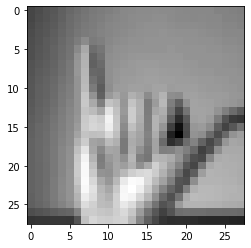

In [15]:
plt.imshow(X[0], cmap='gray'), y[2]

In [16]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # Interupts training when there is no progress

In [37]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.7326

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 26s 21ms/step - loss: 0.8774 - accuracy: 0.7326 - val_loss: 0.0267 - val_accuracy: 0.9935
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9994

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/20
778/782 [============================>.] - ETA: 0s - loss: 5.8701e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 5.9076e-04 - accuracy: 1.0000 - val_loss: 4.7529e-04 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9893

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 2.4525e-04 - val_accuracy: 1.0000
Epoch 5/20
779/782 [============================>.] - ETA: 0s - loss: 1.2933e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.2916e-04 - accuracy: 1.0000 - val_loss: 1.0227e-04 - val_accuracy: 1.0000
Epoch 6/20
782/782 [==============================] - ETA: 0s - loss: 6.1190e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 6.1190e-05 - accuracy: 1.0000 - val_loss: 5.5581e-05 - val_accuracy: 1.0000
Epoch 7/20
779/782 [============================>.] - ETA: 0s - loss: 3.5186e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 3.5120e-05 - accuracy: 1.0000 - val_loss: 3.2938e-05 - val_accuracy: 1.0000
Epoch 8/20
778/782 [============================>.] - ETA: 0s - loss: 2.1345e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 2.1343e-05 - accuracy: 1.0000 - val_loss: 2.0919e-05 - val_accuracy: 1.0000
Epoch 9/20
779/782 [============================>.] - ETA: 0s - loss: 1.3634e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.3638e-05 - accuracy: 1.0000 - val_loss: 1.3809e-05 - val_accuracy: 1.0000
Epoch 10/20
778/782 [============================>.] - ETA: 0s - loss: 9.0006e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 17ms/step - loss: 8.9994e-06 - accuracy: 1.0000 - val_loss: 8.8405e-06 - val_accuracy: 1.0000
Epoch 11/20
780/782 [============================>.] - ETA: 0s - loss: 5.8028e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 5.8089e-06 - accuracy: 1.0000 - val_loss: 5.6665e-06 - val_accuracy: 1.0000
Epoch 12/20
782/782 [==============================] - ETA: 0s - loss: 3.8640e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 3.8640e-06 - accuracy: 1.0000 - val_loss: 3.9938e-06 - val_accuracy: 1.0000
Epoch 13/20
781/782 [============================>.] - ETA: 0s - loss: 2.5768e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 2.5762e-06 - accuracy: 1.0000 - val_loss: 2.6486e-06 - val_accuracy: 1.0000
Epoch 14/20
782/782 [==============================] - ETA: 0s - loss: 1.7138e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 16ms/step - loss: 1.7138e-06 - accuracy: 1.0000 - val_loss: 1.8131e-06 - val_accuracy: 1.0000
Epoch 15/20
782/782 [==============================] - ETA: 0s - loss: 1.1717e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 1.1717e-06 - accuracy: 1.0000 - val_loss: 1.2420e-06 - val_accuracy: 1.0000
Epoch 16/20
779/782 [============================>.] - ETA: 0s - loss: 7.6287e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 7.6705e-07 - accuracy: 1.0000 - val_loss: 8.0546e-07 - val_accuracy: 1.0000
Epoch 17/20
782/782 [==============================] - ETA: 0s - loss: 5.0912e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 13s 16ms/step - loss: 5.0912e-07 - accuracy: 1.0000 - val_loss: 5.3233e-07 - val_accuracy: 1.0000
Epoch 18/20
782/782 [==============================] - ETA: 0s - loss: 3.4244e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 12s 15ms/step - loss: 3.4244e-07 - accuracy: 1.0000 - val_loss: 4.0079e-07 - val_accuracy: 1.0000
Epoch 19/20
779/782 [============================>.] - ETA: 0s - loss: 2.2810e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 11s 15ms/step - loss: 2.2815e-07 - accuracy: 1.0000 - val_loss: 2.9071e-07 - val_accuracy: 1.0000
Epoch 20/20
780/782 [============================>.] - ETA: 0s - loss: 1.5193e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 11s 15ms/step - loss: 1.5183e-07 - accuracy: 1.0000 - val_loss: 1.6801e-07 - val_accuracy: 1.0000


In [38]:
history.history # Contains the training related information for each epoch

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [66]:
# Saving the history object

# with open('models/intial-end-to-end-history', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [20]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [21]:
best_model = keras.models.load_model('models/initial-end-to-end') # Model with best set of parameters not necessarily the model at the last epoch of training

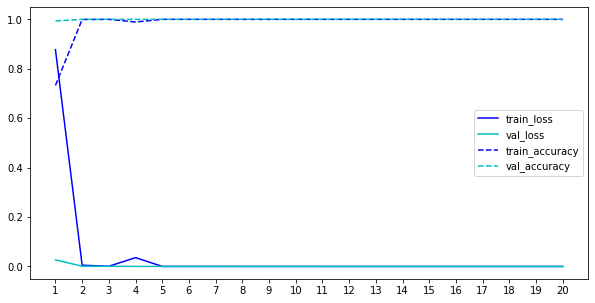

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [22]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [23]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [24]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [25]:
y_test = label_binarizer.transform(y_test)

In [26]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 8s 8ms/step - loss: 87.9661 - accuracy: 0.9405


[87.96614074707031, 0.9404628872871399]

Accuracy: 94%

In [97]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [98]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'])

225/225 [==============================] - 1s 4ms/step - loss: 87.9655 - accuracy: 0.9405
Loss: 87.966 Accuracy: 0.940


### Converting Images to a Sentence

In [99]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [100]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [101]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [102]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [103]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [104]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 61ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [108]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 15ms/step
sign language


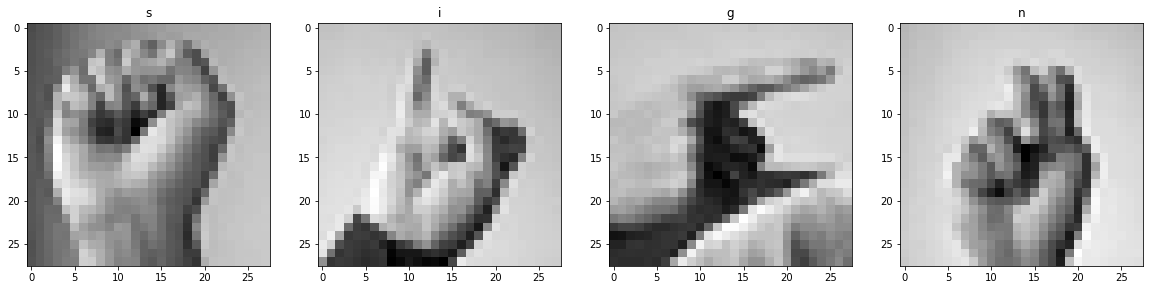

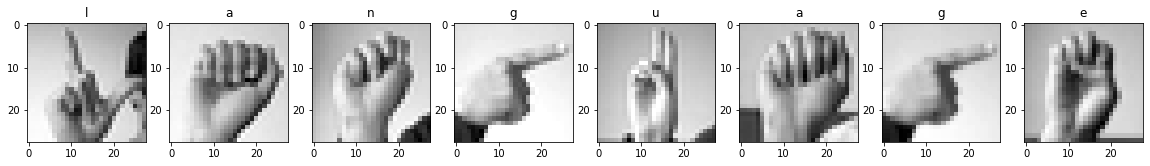

In [109]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [110]:
def test_on_sentence(model, sentence, X_test, y_test, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 16ms/step
The actual sentence is "sign language"
The predicted sentence is "sign language"


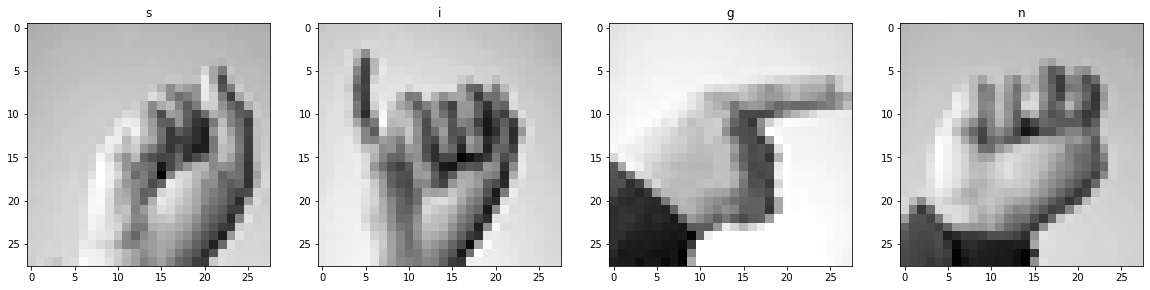

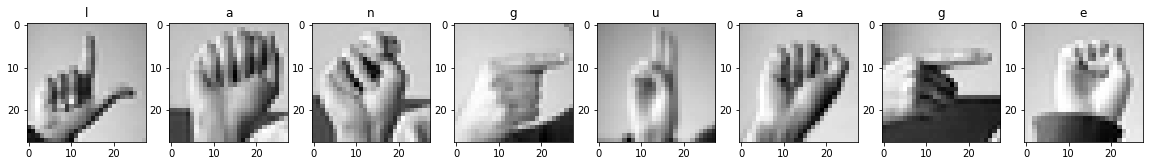

In [112]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'])